# Business Understanding

## Problems Statement

Apartemen merupakan salah satu jawaban dari kebutuhan tempat tinggal di era modern dengan keadaan lahan pemukiman yang terbatas dan aktifitas bisnis yang padat di area perkotaan. oleh karena itu, penentuan harga apartemen yang terpengaruh dengan berbagai faktor internal dan eksternal merupakan hal yang menarik. 

Penawaran unit apartemen biasa dilakukan baik oleh perusahaan maupun individu. Penjual dapat menjual unit apartemen mereka di platform dengan menentukan harga aprtemen mereka.  Salah satu tantangan terbesar bagi seorang agent property adalah untuk menyesuaikan dengan harga pasar. Apabila harga apartemen terlalu tinggi dibanding dengan harga pasar, apartemen akan sulit untuk dijual. Sebaliknya, apa bila harganya terlalu rendah, pemilik apartemen akan kesulitan untuk medapatkan keuntunga yang maksimal.

## Goals
Berdasarkan permasalahan tersebut, seorang agent property tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu klien mereka (dalam hal ini pemilik apartemen) untuk dapat **menentukan harga jual apartemen yang tepat untuk tiap apartemen yang baru akan mereka jual**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu apartemen, seperti tipe apartemen, jarak waktu ke subway terdekat, fasilitas, luasan, dan tahun pembangunan dapat menambah keakuratan prediksi harga jual apartemen yang bersaing dengan harga pasar.

Bagi seorang agent  property, prediction tool yang dapat memberikan prediksi harga secara fair tentu dapat meningkatkan jumlah client. Dengan kata lain, semakin banyak client berarti dapat meningkatkan keuntungan bagi seorang agent property.

- 0 : *Marketprice*
- 1 : *Overprice*

## Data Dictionary

| Attribute | Description |
| --- | --- |
| Hallway Type | Apartment type |
| TimeToSubway | Time needed to the nearest subway station |
| SubwayStation | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | The number of public office facilities nearby |
| N_SchoolNearBy(University) | The number of universities nearby |
| N_Parkinglot(Basement) | The number of the parking lot |
| YearBuilt | The year the apartment was built |
| N_FacilitiesInApt | Number of facilities in the apartment |
| Size(sqft) | The apartment size (in square feet) |
| SalePrice | The apartment price (Won) |


# Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import time

import shap

import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor # Model Baru 1
from lightgbm import LGBMRegressor # Model Baru 2

c:\Users\Teguh Iman\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


# Exploratory Data Analysis

In [3]:
df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [4]:
map_TTS = {'10min~15min' : '10min-15min',
           '15min~20min' : '15min-20min',
           '5min~10min' : '5min-10min',
           'no_bus_stop_nearby' : 'tidak ada subway station'}

df['TimeToSubway'] = df['TimeToSubway'].replace(map_TTS)

df


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min-10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [5]:
flt_int = {'N_FacilitiesNearBy(PublicOffice)' : int,
'N_SchoolNearBy(University)' : int,
'N_Parkinglot(Basement)' : int,
'N_FacilitiesNearBy(ETC)' : int}

df = df.astype(flt_int)

In [6]:
numerical_feature_list = df.select_dtypes(exclude= ["object", "int32"]).columns
categorical_feature_list = df.select_dtypes(include= "object").columns

In [7]:
df_eda = df.copy()
df_eda.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [8]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


In [9]:
df_eda.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [10]:
df_eda.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [11]:
display(df_eda, df_eda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4121,corridor,5min-10min,Daegu,2,5,0,76,1985,3,676,73451


None

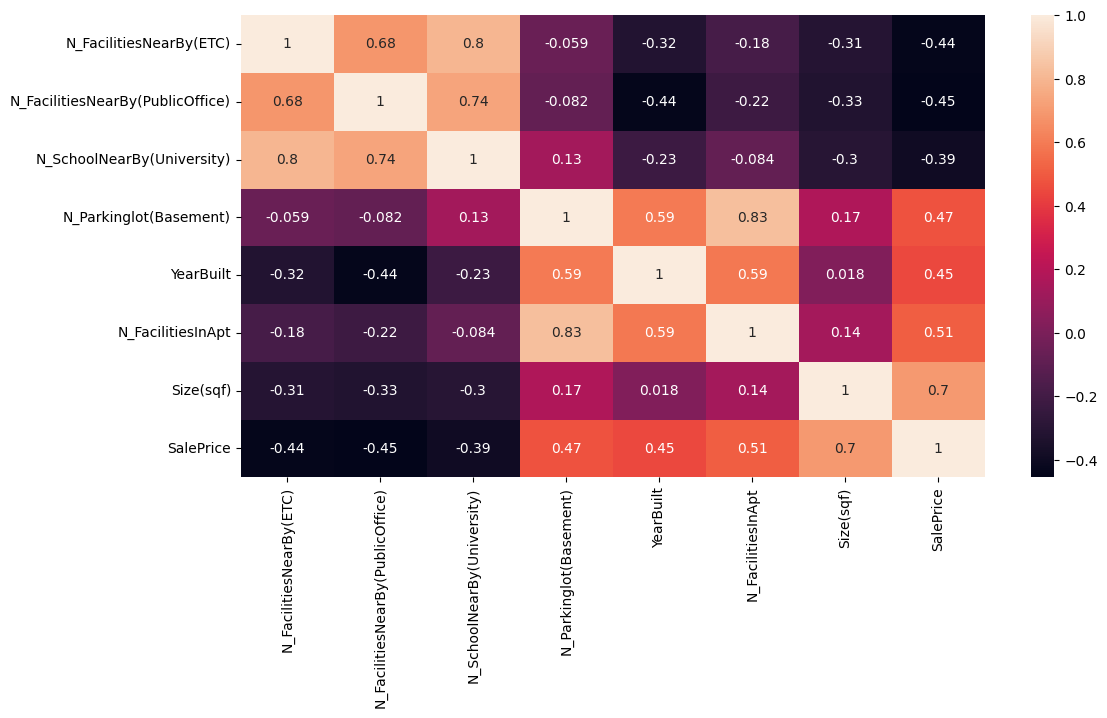

In [12]:
plt.figure(figsize= (12, 6))
sb.heatmap(
    df_eda[numerical_feature_list].corr(),
    annot= True
)

plt.show()

menghapus feature 'N_Parkinglot(Basement)', 'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)', karena sudah terwakilkan dengan feature 'N_FacilitiesNearBy(ETC)' dan 'N_FacilitiesInApt'

In [13]:
df_eda.drop(columns= ['N_Parkinglot(Basement)', 'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)'], inplace= True)

### Pengaruh Jarak Apartement dengan subway station terhadap harga apartemen

In [14]:
terraced_type_dataset = df_eda[df_eda.HallwayType == 'terraced']
corridor_type_dataset = df_eda[df_eda.HallwayType == 'corridor']
mixed_type_dataset = df_eda[df_eda.HallwayType == 'mixed']

C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_14840\796147500.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(
C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_14840\796147500.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(
C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_14840\796147500.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(


Text(0, 0.5, 'Harga Apartemen')

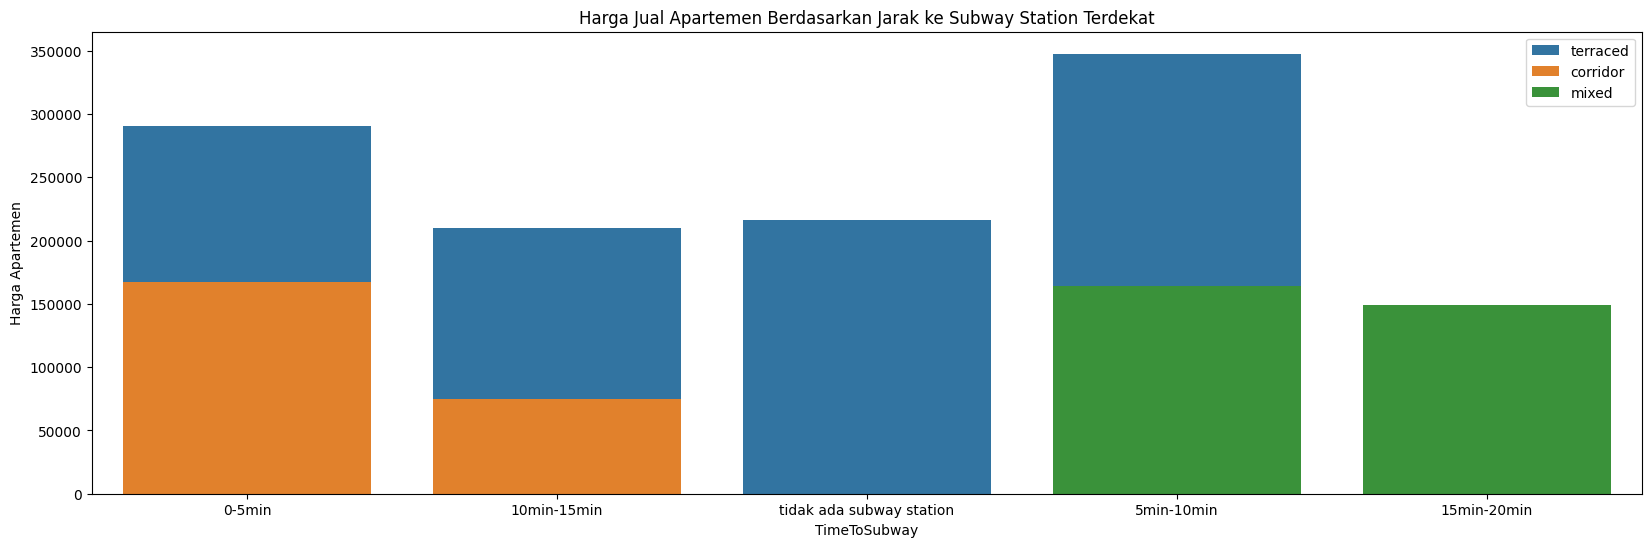

In [38]:
plt.figure(figsize= (20, 6))

sb.barplot(
    data= terraced_type_dataset,
    x= 'TimeToSubway',
    y= 'SalePrice',
    label = 'terraced',
    ci = None
)

sb.barplot(
    data= corridor_type_dataset,
    x= 'TimeToSubway',
    y= 'SalePrice',
    label = 'corridor',
    ci = None
)

sb.barplot(
    data= mixed_type_dataset,
    x= 'TimeToSubway',
    y= 'SalePrice',
    label = 'mixed',
    ci = None
)

plt.title("Harga Jual Apartemen Berdasarkan Jarak ke Subway Station Terdekat")

plt.ylabel("Harga Apartemen")

### Pengaruh fasilitas dan fasilitas terdekat terhadap harga apartemen 

In [16]:
fsl_apt = df_eda[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesInApt', 'SalePrice']]
fsl_apt

,N_FacilitiesNearBy(ETC),N_FacilitiesInApt,SalePrice
0,0,10,346017
1,1,4,150442
2,1,5,61946
3,5,7,165486
4,0,5,311504
...,...,...,...
4118,0,8,323008
4119,5,4,242477
4120,5,4,168141
4121,2,3,73451


In [17]:
display(fsl_apt.max(), fsl_apt.min())

N_FacilitiesNearBy(ETC)         5
N_FacilitiesInApt              10
SalePrice                  585840
dtype: int64

N_FacilitiesNearBy(ETC)        0
N_FacilitiesInApt              1
SalePrice                  32743
dtype: int64

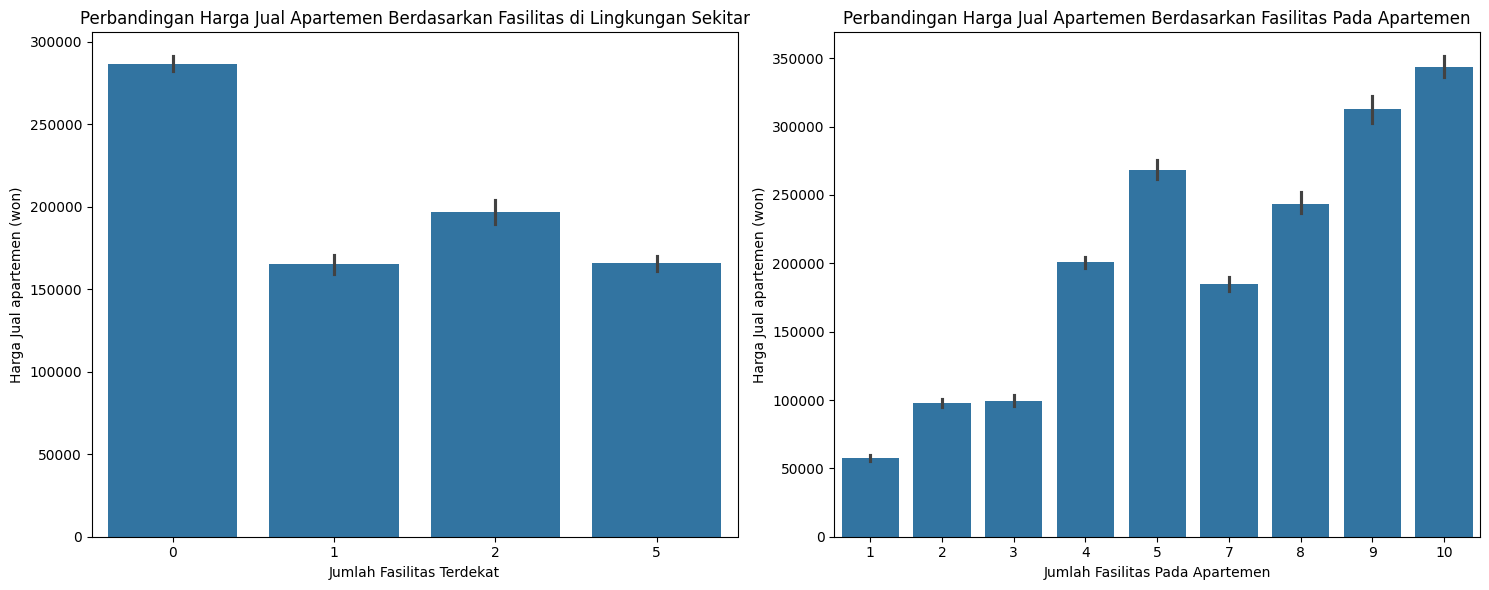

None

,N_FacilitiesNearBy(ETC),N_FacilitiesInApt,SalePrice
2128,0,10,585840
2918,0,10,570796
550,0,10,570796
204,0,10,566371
234,0,10,566371


In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sb.barplot(
    data=df_eda,
    x="N_FacilitiesNearBy(ETC)",
    y='SalePrice',
    ax=axes[0]
)
axes[0].set_title("Perbandingan Harga Jual Apartemen Berdasarkan Fasilitas di Lingkungan Sekitar")
axes[0].set_ylabel("Harga Jual apartemen (won)")
axes[0].set_xlabel("Jumlah Fasilitas Terdekat")

sb.barplot(
    data=df_eda,
    x="N_FacilitiesInApt",
    y='SalePrice',
    ax=axes[1]
)
axes[1].set_title("Perbandingan Harga Jual Apartemen Berdasarkan Fasilitas Pada Apartemen")
axes[1].set_ylabel("Harga Jual apartemen (won)")
axes[1].set_xlabel("Jumlah Fasilitas Pada Apartemen")

plt.tight_layout()

display(plt.show(), fsl_apt.sort_values('SalePrice', ascending= False).head())

diketahui bahwa jumlah fasilitas disekitar tidak terlalu memengaruhi harga jual apartement, namun fasilitas yang terdapat pada apartement itu sendiri sangat memengaruhi, dimana seakin banyak fasilitas semakin tinggi harga apartemen.

### Harga pasar pada setiap tipe apartemen

Text(0.5, 0, 'Tipe Apaertemen')

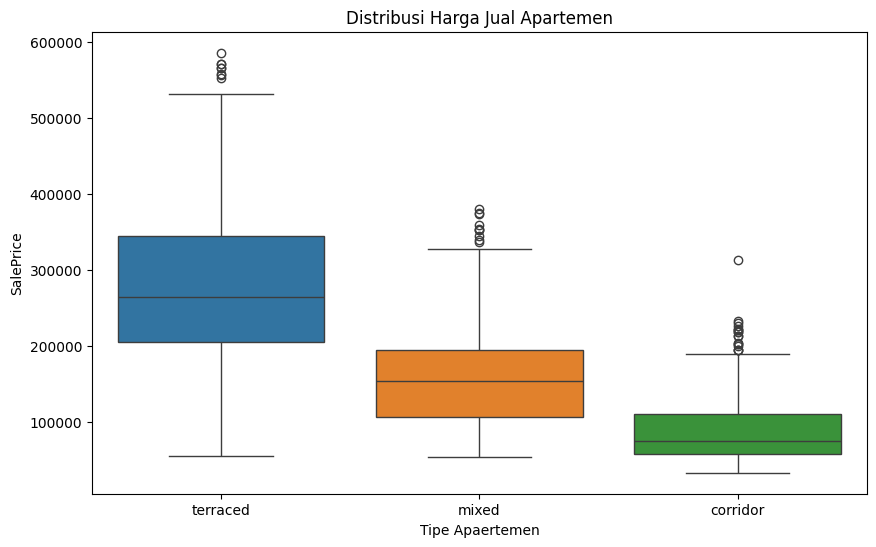

In [19]:
plt.figure(figsize= (10,6))
plt.ticklabel_format(style= 'plain')

sb.boxplot(
    data= df_eda,
    y= 'SalePrice',
    x= 'HallwayType',
    hue= 'HallwayType',
)

plt.title('Distribusi Harga Jual Apartemen')
plt.xlabel('Tipe Apaertemen')

In [20]:
Q1_trc = df_eda[df_eda['HallwayType'] == 'terraced']['SalePrice'].quantile(0.25)
Q3_trc = df_eda[df_eda['HallwayType'] == 'terraced']['SalePrice'].quantile(0.75)
IQR_trc = Q3_trc - Q1_trc
ats_trc = Q3_trc + (1.5 * IQR_trc)
bwh_trc = Q1_trc - (1.5 * IQR_trc)

Q1_mxd = df_eda[df_eda['HallwayType'] == 'mixed']['SalePrice'].quantile(0.25)
Q3_mxd = df_eda[df_eda['HallwayType'] == 'mixed']['SalePrice'].quantile(0.75)
IQR_mxd = Q3_mxd - Q1_mxd
ats_mxd = Q3_mxd + (1.5 * IQR_mxd)
bwh_mxd = Q1_mxd - (1.5 * IQR_mxd)

Q1_crd = df_eda[df_eda['HallwayType'] == 'corridor']['SalePrice'].quantile(0.25)
Q3_crd = df_eda[df_eda['HallwayType'] == 'corridor']['SalePrice'].quantile(0.75)
IQR_crd = Q3_crd - Q1_crd
ats_crd = Q3_crd + (1.5 * IQR_crd)
bwh_crd = Q1_crd - (1.5 * IQR_crd)

In [21]:
data = {
    'Q1': [Q1_trc, Q1_mxd, Q1_crd],
    'Q3': [Q3_trc, Q3_mxd, Q3_crd],
    'IQR': [IQR_trc, IQR_mxd, IQR_crd],
    'Batas Atas (Upper Bound)': [ats_trc, ats_mxd, ats_crd],
    'Batas Bawah (Lower Bound)': [bwh_trc, bwh_mxd, bwh_crd]
}

hlw_prc_apt = pd.DataFrame(data, index=['terraced', 'mixed', 'corridor'])


In [22]:
upper_bounds = {
    'terraced': 552654.00,
    'mixed': 328097.75,
    'corridor': 189601.50
}

percentage_outliers = {}

for htype, upper_bound in upper_bounds.items():
    df_subset = df_eda[df_eda['HallwayType'] == htype]
    total_count = len(df_subset)
    outlier_count = len(df_subset[df_subset['SalePrice'] > upper_bound])
    if total_count > 0:
        percentage = (outlier_count / total_count) * 100
    else:
        percentage = 0
    percentage_outliers[htype] = f"{percentage:.2f}% ({outlier_count} dari {total_count})"

hlw_prc_op = pd.Series(percentage_outliers).rename('Persentase Outlier (> Batas Atas)')
hlw_prc_op = pd.DataFrame(hlw_prc_op)

In [23]:
display(hlw_prc_apt, hlw_prc_op)

,Q1,Q3,IQR,Batas Atas (Upper Bound),Batas Bawah (Lower Bound)
terraced,205309.0,344247.0,138938.0,552654.00,-3098.00
mixed,105751.5,194690.0,88938.5,328097.75,-27656.25
corridor,57964.0,110619.0,52655.0,189601.50,-21018.50


,Persentase Outlier (> Batas Atas)
terraced,0.32% (8 dari 2528)
mixed,0.88% (10 dari 1131)
corridor,3.88% (18 dari 464)


dari hasil pengecek pada data outlier terdapat >5% data outlier pada masing-masing tipe apartemen. Kita dapat anggap data ini sebagai apartemen dengan harga OverPrice (melebihi harga pasar).

### Penawaran umum pada apartemen yang dijual

In [24]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HallwayType              4123 non-null   object
 1   TimeToSubway             4123 non-null   object
 2   SubwayStation            4123 non-null   object
 3   N_FacilitiesNearBy(ETC)  4123 non-null   int64 
 4   YearBuilt                4123 non-null   int64 
 5   N_FacilitiesInApt        4123 non-null   int64 
 6   Size(sqf)                4123 non-null   int64 
 7   SalePrice                4123 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 257.8+ KB


In [25]:
df_eda.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,2006,5,1743,311504


In [26]:
mode_fsl_trc = df_eda[df_eda['HallwayType']== 'terraced']['N_FacilitiesInApt'].mode()[0]
mode_tts_trc = df_eda[df_eda['HallwayType']== 'terraced']['TimeToSubway'].mode()[0]
mode_yb_trc = df_eda[df_eda['HallwayType']== 'terraced']['YearBuilt'].mode()[0]
mean_sze_trc = df_eda[df_eda['HallwayType']== 'terraced']['Size(sqf)'].mean()

mode_fsl_crd = df_eda[df_eda['HallwayType']== 'corridor']['N_FacilitiesInApt'].mode()[0]
mode_tts_crd = df_eda[df_eda['HallwayType']== 'corridor']['TimeToSubway'].mode()[0]
mode_yb_crd = df_eda[df_eda['HallwayType']== 'corridor']['YearBuilt'].mode()[0]
mean_sze_crd = df_eda[df_eda['HallwayType']== 'corridor']['Size(sqf)'].mean()

mode_fsl_mxd = df_eda[df_eda['HallwayType']== 'mixed']['N_FacilitiesInApt'].mode()[0]
mode_tts_mxd = df_eda[df_eda['HallwayType']== 'mixed']['TimeToSubway'].mode()[0]
mode_yb_mxd = df_eda[df_eda['HallwayType']== 'mixed']['YearBuilt'].mode()[0]
mean_sze_mxd = df_eda[df_eda['HallwayType']== 'mixed']['Size(sqf)'].mean()

In [27]:
data_modus = {
'Mayoritas memiliki fasilitas berjumlah' : [mode_fsl_trc, mode_fsl_crd, mode_fsl_mxd],
'Mayoritas jarak dengan subway' : [mode_tts_trc, mode_tts_crd, mode_tts_mxd], 
'Mayoritas dibangun tahun' : [mode_yb_trc, mode_yb_crd, mode_yb_mxd],
'Rata-rata luas apartemen' : [mean_sze_trc, mean_sze_crd, mean_sze_mxd]
    }
hlw_fsl_yb = pd.DataFrame(data_modus, index= ['terraced', 'corridor', 'mixed'])
hlw_fsl_yb

,Mayoritas memiliki fasilitas berjumlah,Mayoritas jarak dengan subway,Mayoritas dibangun tahun,Rata-rata luas apartemen
terraced,5,0-5min,2007,1082.332674
corridor,3,10min-15min,1992,509.153017
mixed,7,15min-20min,2005,851.953139


Pengecekan pada nilai modus ini untuk mengetahui jumlah fasilitas, jarak dengan subway, tahun dibangun, dan rata-rata luasan dari kebanyakan unit yang terjual pada masing masing tipe apartemen. Data ini dapat digunakan sebagai pembanding untuk memberikan nilai jual yang lebih pada unit yang selanjutnya akan dijual apabila memiliki kelebihan dari 4 indikator ini.

# Modeling

In [28]:
df_modeling = df.copy()
df_modeling.drop(columns= ['SubwayStation','N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)', 'N_Parkinglot(Basement)'], inplace= True)
df_modeling

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,0,2007,10,1387,346017
1,terraced,10min-15min,1,1986,4,914,150442
2,mixed,15min-20min,1,1997,5,558,61946
3,mixed,5min-10min,5,2005,7,914,165486
4,terraced,0-5min,0,2006,5,1743,311504
...,...,...,...,...,...,...,...
4118,terraced,0-5min,0,2008,8,914,323008
4119,mixed,15min-20min,5,1993,4,1451,242477
4120,mixed,15min-20min,5,1993,4,1761,168141
4121,corridor,5min-10min,2,1985,3,676,73451


In [29]:
X = df_modeling.drop('SalePrice', axis=1)
y = df_modeling['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data berhasil dimuat dan dipisahkan.")

Data berhasil dimuat dan dipisahkan.


## Data preProcessing

In [30]:
numerical_features = ['Size(sqf)', 'YearBuilt', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(ETC)']
categorical_features = ['HallwayType', 'TimeToSubway']

preprocessor = ColumnTransformer(
    transformers=[
        
        ('num', StandardScaler(), numerical_features),
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)

## Data Training

In [31]:
# Model A: Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Model B: Random Forest Regressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Model C: XGBoost Regressor
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1))
])

# Model D: LightGBM Regressor
lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1))
])


print("Memulai pelatihan model...")
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
print("Pelatihan model Boosting selesai.")

Memulai pelatihan model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 3298, number of used features: 12
[LightGBM] [Info] Start training from score 222322.924196
Pelatihan model Boosting selesai.


## Model Evaluation

In [32]:
models = {
    "Linear Regression": linear_model,
    "Random Forest Regressor": rf_model,
    'XGBoost Regressor' : xgb_model,
    'LightGBM Regressor' : lgbm_model,
}

results = []

for name, model in models.items():
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE (Mean Absolute Error)': mae 
    })

results_df = pd.DataFrame(results)
print("\n========== Hasil Evaluasi Model Regresi ==========")
print(results_df.sort_values(['R2 Score', 'MAE (Mean Absolute Error)'], ascending= (False, True)).reset_index())
print("==================================================")


========== Hasil Evaluasi Model Regresi ==========
   index                    Model  R2 Score  MAE (Mean Absolute Error)
0      1  Random Forest Regressor  0.843673               32163.036328
1      2        XGBoost Regressor  0.843376               32205.507812
2      3       LightGBM Regressor  0.840981               32312.005720
3      0        Linear Regression  0.740422               42714.305896


c:\Users\Teguh Iman\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Feature Importance

In [33]:
feature_names = numerical_features + list(rf_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))


importances = rf_model.named_steps['regressor'].feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n========== Feature Importance (Random Forest) ==========")
print(feature_importance_df.head(10))


========== Feature Importance (Random Forest) ==========
                     Feature  Importance
0                  Size(sqf)    0.449745
6       HallwayType_terraced    0.360200
1                  YearBuilt    0.084770
2          N_FacilitiesInApt    0.059755
3    N_FacilitiesNearBy(ETC)    0.034635
4       HallwayType_corridor    0.003691
7        TimeToSubway_0-5min    0.002288
5          HallwayType_mixed    0.002176
9   TimeToSubway_15min-20min    0.001075
10   TimeToSubway_5min-10min    0.000980


## Model Deployment

In [34]:
best_model = rf_model
best_model.fit(X,y)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
model_path = 'D:\Purwadhika\Learning Purwadhika\Capstone 3_ML'
model_path

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Teguh Iman\AppData\Local\Temp\ipykernel_14840\3618392190.py:1: SyntaxWarning: invalid escape sequence '\P'
  model_path = 'D:\Purwadhika\Learning Purwadhika\Capstone 3_ML'


'D:\\Purwadhika\\Learning Purwadhika\\Capstone 3_ML'

In [36]:
model_file_name = 'Capstone3_model.sav'
f"{model_path}/{model_file_name}"

'D:\\Purwadhika\\Learning Purwadhika\\Capstone 3_ML/Capstone3_model.sav'

In [37]:
pickle.dump(
    best_model, 
    open(file= f"{model_path}/{model_file_name}", mode= "wb")
)